In [8]:
# import libraries
from cil.optimisation.functions import TotalVariation, L2NormSquared
from cil.framework import ImageGeometry
from cil.utilities import noise

from skimage import data
from skimage.metrics import structural_similarity as ssim

import matplotlib.pyplot as plt
import numpy as np

In [9]:
# Load chelsea image from skimage
image = data.astronaut().astype("float32")/255.0

In [10]:
# Setup the image domain and fill the image into an ImageData
ig = ImageGeometry(voxel_num_y=image.shape[1], voxel_num_x=image.shape[0], channels=image.shape[2],
                  dimension_labels=['horizontal_x', 'horizontal_y', 'channel'])
data = ig.allocate()
data.fill(image)

In [11]:
# Add gaussian noise
noisy_data = noise.gaussian(data, seed = 10, var = 0.005)

In [12]:
# Regularisation parameter for the Total variation term
alpha = 0.1
TV = alpha * TotalVariation(max_iteration=100)

# Run proximal operator for the TotalVariation
proxTV = TV.proximal(noisy_data, tau=1.0)

Initialised GradientOperator with numpy backend


In [13]:
# Compute SSIM from Scikit-Image
val_ssim = ssim(data.as_array(), proxTV.as_array(), data_range = 1., multichannel=True)

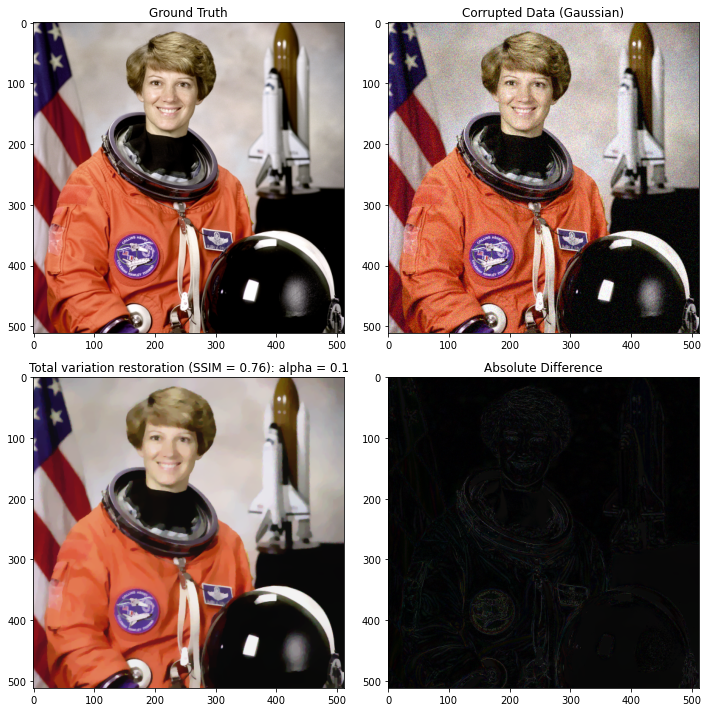

In [14]:
fig, ax = plt.subplots(nrows=2,ncols=2, figsize=(10,10))
ax[0,0].imshow(data.as_array())
ax[0,0].set_title("Ground Truth")
ax[0,1].imshow(noisy_data.as_array())
ax[0,1].set_title("Corrupted Data (Gaussian)")
ax[1,0].imshow(proxTV.as_array())
ax[1,0].set_title("Total variation restoration (SSIM = {:.2f}): alpha = {}".format(val_ssim, alpha))
ax[1,1].imshow((proxTV-data).abs().as_array())
ax[1,1].set_title("Absolute Difference")
plt.tight_layout()
plt.show()